<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n250.csv',
 'data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n30.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,92.557554,-7652.591732,-7550.034178,-778.269599,-6771.764579
1,0.0,1.0,41.333867,102.821992,154.155859,-83.246634,237.402492
2,0.0,2.0,29.600030,-741.969524,-702.369494,75.962638,-778.332132
3,0.0,3.0,49.533872,-2014.622452,-1955.088580,-194.507504,-1760.581076
4,0.0,4.0,62.443429,-156.750208,-84.306779,-369.669412,285.362633
...,...,...,...,...,...,...,...
59995,999.0,55.0,68.507725,1175.955951,1254.463676,-403.287751,1657.751427
59996,999.0,56.0,52.136453,-428.582677,-366.446224,30.766797,-397.213021
59997,999.0,57.0,23.046377,315.161725,348.208102,802.037382,-453.829280
59998,999.0,58.0,54.869956,-1223.425603,-1158.555647,-41.707073,-1116.848575


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,92.557554,-7652.591732,-7550.034178,-778.269599,-6771.764579
1,0.0,1.0,41.333867,102.821992,154.155859,-83.246634,237.402492
2,0.0,2.0,29.600030,-741.969524,-702.369494,75.962638,-778.332132
3,0.0,3.0,49.533872,-2014.622452,-1955.088580,-194.507504,-1760.581076
4,0.0,4.0,62.443429,-156.750208,-84.306779,-369.669412,285.362633
...,...,...,...,...,...,...,...
59995,999.0,55.0,68.507725,1175.955951,1254.463676,-403.287751,1657.751427
59996,999.0,56.0,52.136453,-428.582677,-366.446224,30.766797,-397.213021
59997,999.0,57.0,23.046377,315.161725,348.208102,802.037382,-453.829280
59998,999.0,58.0,54.869956,-1223.425603,-1158.555647,-41.707073,-1116.848575


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    92.557554 -7652.591732 -7550.034178 -778.269599 -6771.764579
      1.0    41.333867   102.821992   154.155859  -83.246634   237.402492
      2.0    29.600030  -741.969524  -702.369494   75.962638  -778.332132
      3.0    49.533872 -2014.622452 -1955.088580 -194.507504 -1760.581076
      4.0    62.443429  -156.750208   -84.306779 -369.669412   285.362633
...                ...          ...          ...         ...          ...
999.0 55.0   68.507725  1175.955951  1254.463676 -403.287751  1657.751427
      56.0   52.136453  -428.582677  -366.446224   30.766797  -397.213021
      57.0   23.046377   315.161725   348.208102  802.037382  -453.829280
      58.0   54.869956 -1223.425603 -1158.555647  -41.707073 -1116.848575
      59.0   43.774375 -1483.563336 -1429.788961  252.472123 -1682.261084

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    92.557554 -7652.591732 -7550.034178 -778.269599 -6771.764579
      1.0    41.333867   102.821992   154.155859  -83.246634   237.402492
      2.0    29.600030  -741.969524  -702.369494   75.962638  -778.332132
      3.0    49.533872 -2014.622452 -1955.088580 -194.507504 -1760.581076
      4.0    62.443429  -156.750208   -84.306779 -369.669412   285.362633
...                ...          ...          ...         ...          ...
999.0 55.0   68.507725  1175.955951  1254.463676 -403.287751  1657.751427
      56.0   52.136453  -428.582677  -366.446224   30.766797  -397.213021
      57.0   23.046377   315.161725   348.208102  802.037382  -453.829280
      58.0   54.869956 -1223.425603 -1158.555647  -41.707073 -1116.848575
      59.0   43.774375 -1483.563336 -1429.788961  252.472123 -1682.261084

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,92.557554,-7652.591732,-7550.034178,-778.269599,-6771.764579
1,0.0,1.0,41.333867,102.821992,154.155859,-83.246634,237.402492
2,0.0,2.0,29.600030,-741.969524,-702.369494,75.962638,-778.332132
3,0.0,3.0,49.533872,-2014.622452,-1955.088580,-194.507504,-1760.581076
4,0.0,4.0,62.443429,-156.750208,-84.306779,-369.669412,285.362633
...,...,...,...,...,...,...,...
59995,999.0,55.0,68.507725,1175.955951,1254.463676,-403.287751,1657.751427
59996,999.0,56.0,52.136453,-428.582677,-366.446224,30.766797,-397.213021
59997,999.0,57.0,23.046377,315.161725,348.208102,802.037382,-453.829280
59998,999.0,58.0,54.869956,-1223.425603,-1158.555647,-41.707073,-1116.848575


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    92.557554 -7652.591732 -7550.034178 -778.269599 -6771.764579
      1.0    41.333867   102.821992   154.155859  -83.246634   237.402492
      2.0    29.600030  -741.969524  -702.369494   75.962638  -778.332132
      3.0    49.533872 -2014.622452 -1955.088580 -194.507504 -1760.581076
      4.0    62.443429  -156.750208   -84.306779 -369.669412   285.362633
...                ...          ...          ...         ...          ...
999.0 55.0   68.507725  1175.955951  1254.463676 -403.287751  1657.751427
      56.0   52.136453  -428.582677  -366.446224   30.766797  -397.213021
      57.0   23.046377   315.161725   348.208102  802.037382  -453.829280
      58.0   54.869956 -1223.425603 -1158.555647  -41.707073 -1116.848575
      59.0   43.774375 -1483.563336 -1429.788961  252.472123 -1682.261084

[60000 rows x 5 columns]

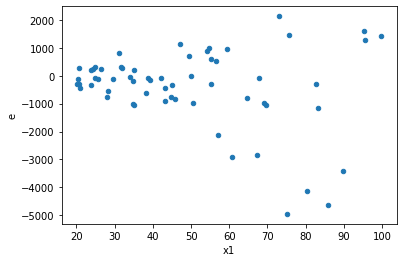

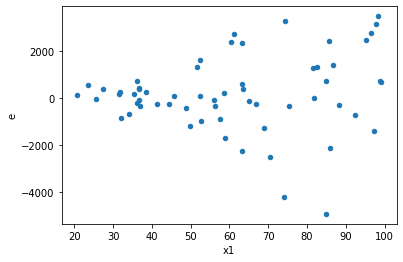

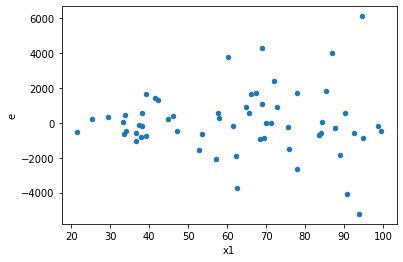

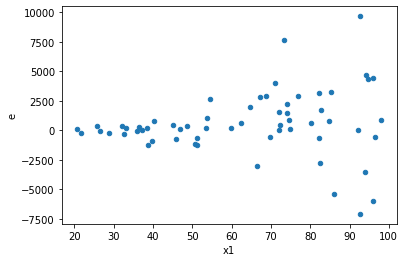

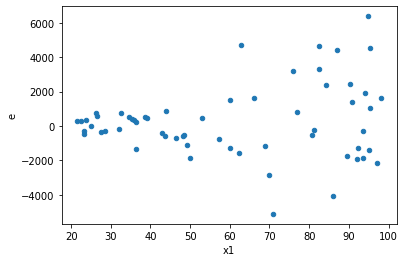

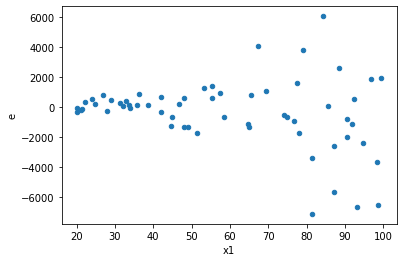

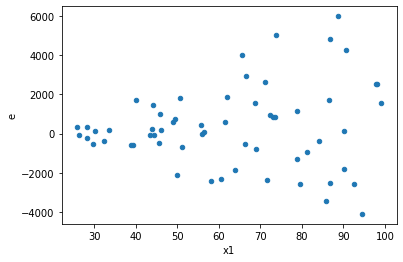

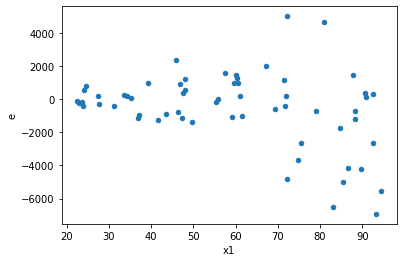

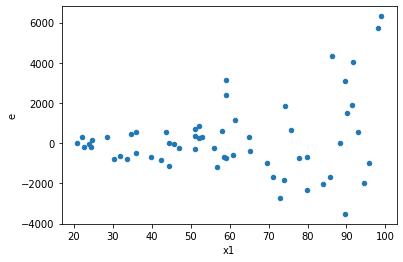

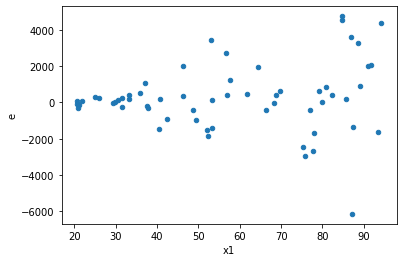

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,23.0,23.0,10536784.435034947,354654617.87921035,458121.0623928238,15419765.994748276,33.65871438918111,2.0399237854462626e-12,0.99999999999898,1.0199618927231313e-12,Reject005=0 : Heteroscedasticity
3.0,23.0,23.0,6972267.713482678,198843067.82544348,303142.07449924684,8645350.775019282,28.519138391793128,1.2291945239439883e-11,0.999999999993854,6.1459726197199416e-12,Reject005=0 : Heteroscedasticity
4.0,23.0,23.0,15932756.265253086,234185582.87046733,692728.5332718733,10181981.863933362,14.698372269786768,1.2968129681212304e-08,0.9999999935159352,6.484064840606152e-09,Reject005=0 : Heteroscedasticity
8.0,23.0,23.0,3801295.4745864007,198645260.94484824,165273.71628636523,8636750.475862967,52.25725342133837,1.6209256159527285e-14,0.9999999999999919,8.104628079763643e-15,Reject005=0 : Heteroscedasticity
9.0,23.0,23.0,8471814.58914486,121513106.82644266,368339.7647454287,5283178.55767142,14.34322075251037,1.6619482900992466e-08,0.9999999916902585,8.309741450496233e-09,Reject005=0 : Heteroscedasticity
11.0,23.0,23.0,8725703.274257973,98060858.07598716,379378.4032286075,4263515.568521181,11.238160981852342,1.8874994478501605e-07,0.9999999056250276,9.437497239250803e-08,Reject005=0 : Heteroscedasticity
13.0,23.0,23.0,8613829.360705845,356466774.7254496,374514.3200306889,15498555.422845636,41.38307828009256,2.1249668691325496e-13,0.9999999999998938,1.0624834345662748e-13,Reject005=0 : Heteroscedasticity
14.0,23.0,23.0,6968966.946098421,191876594.5472633,302998.5628738444,8342460.632489708,27.533003963332824,1.7957857423311907e-11,0.9999999999910211,8.978928711655954e-12,Reject005=0 : Heteroscedasticity
16.0,23.0,23.0,16449881.633271854,184385392.50437757,715212.2449248632,8016756.195842504,11.208919104404742,1.936207136843393e-07,0.9999999031896432,9.681035684216965e-08,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,243501574.5032127,6112003.01157824,10587024.978400553,265739.261372967,0.02510046608137066,3.2266239859447275e-13,Reject005=0 : Heteroscedasticity
1.0,23.0,23.0,10536784.435034947,354654617.87921035,458121.0623928238,15419765.994748276,33.65871438918111,2.0399237854462626e-12,Reject005=0 : Heteroscedasticity
2.0,23.0,23.0,294943945.4804969,4998428.985878988,12823649.803499864,217322.99938604297,0.016947047269392106,4.171355123994335e-15,Reject005=0 : Heteroscedasticity
3.0,23.0,23.0,6972267.713482678,198843067.82544348,303142.07449924684,8645350.775019282,28.519138391793128,1.2291945239439883e-11,Reject005=0 : Heteroscedasticity
4.0,23.0,23.0,15932756.265253086,234185582.87046733,692728.5332718733,10181981.863933362,14.698372269786768,1.2968129681212304e-08,Reject005=0 : Heteroscedasticity
5.0,23.0,23.0,198821815.39123112,9194510.273094807,8644426.756140484,399761.3162215133,0.04624497696594477,2.3629190738379455e-10,Reject005=0 : Heteroscedasticity
6.0,23.0,23.0,199752101.00972447,6949203.345377612,8684873.956944542,302139.27588598314,0.034789137687414394,1.1290822657127215e-11,Reject005=0 : Heteroscedasticity
7.0,23.0,23.0,203730076.49808586,18172038.678000793,8857829.412960256,790088.6381739475,0.08919664190167584,1.932385523611436e-07,Reject005=0 : Heteroscedasticity
8.0,23.0,23.0,3801295.4745864007,198645260.94484824,165273.71628636523,8636750.475862967,52.25725342133837,1.6209256159527285e-14,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64